In [1]:
#importing all the libraries which are neede
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
col_names = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
df = pd.read_csv("auto-mpg.data", header=None, delim_whitespace=True)
df.columns = col_names
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [3]:
# df = df[df['horsepower'] != '?']

In [4]:
df.horsepower.replace('?',np.NaN,inplace=True)
df.horsepower = df['horsepower'].astype('float',errors= 'ignore')
df.horsepower.replace(np.NaN,df.horsepower.median(),inplace=True)

In [5]:
#Describe dataset
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
#get info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


<AxesSubplot:>

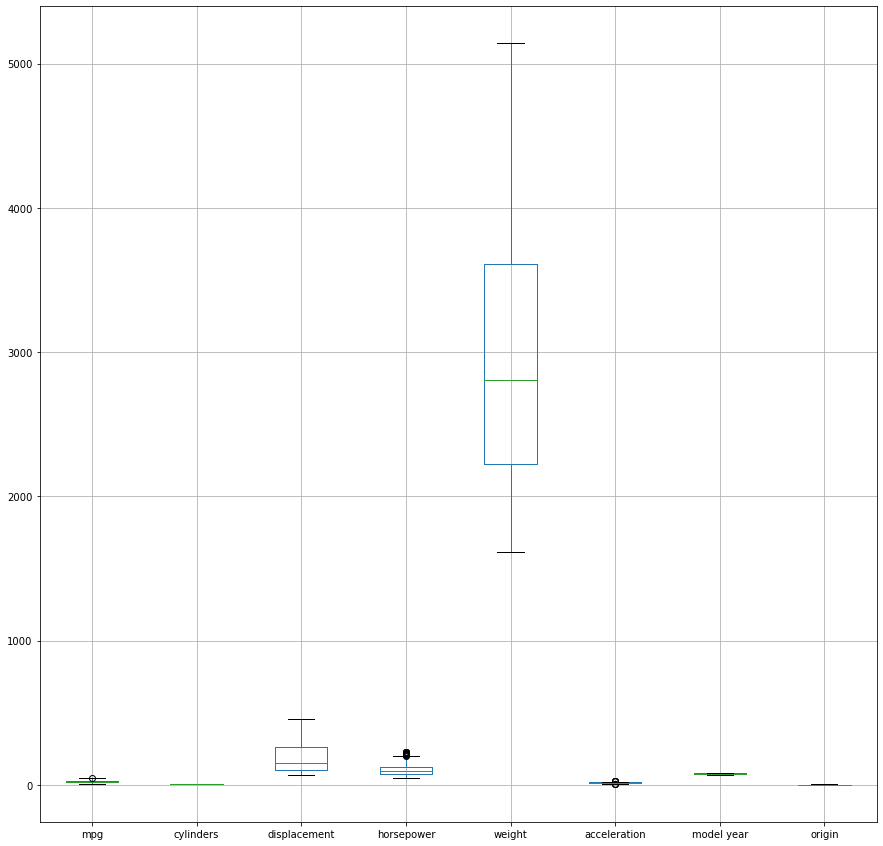

In [7]:
pd.plotting.boxplot_frame(df,figsize=(15,15))

In [8]:
X=df[df.columns.difference(['car name'])]

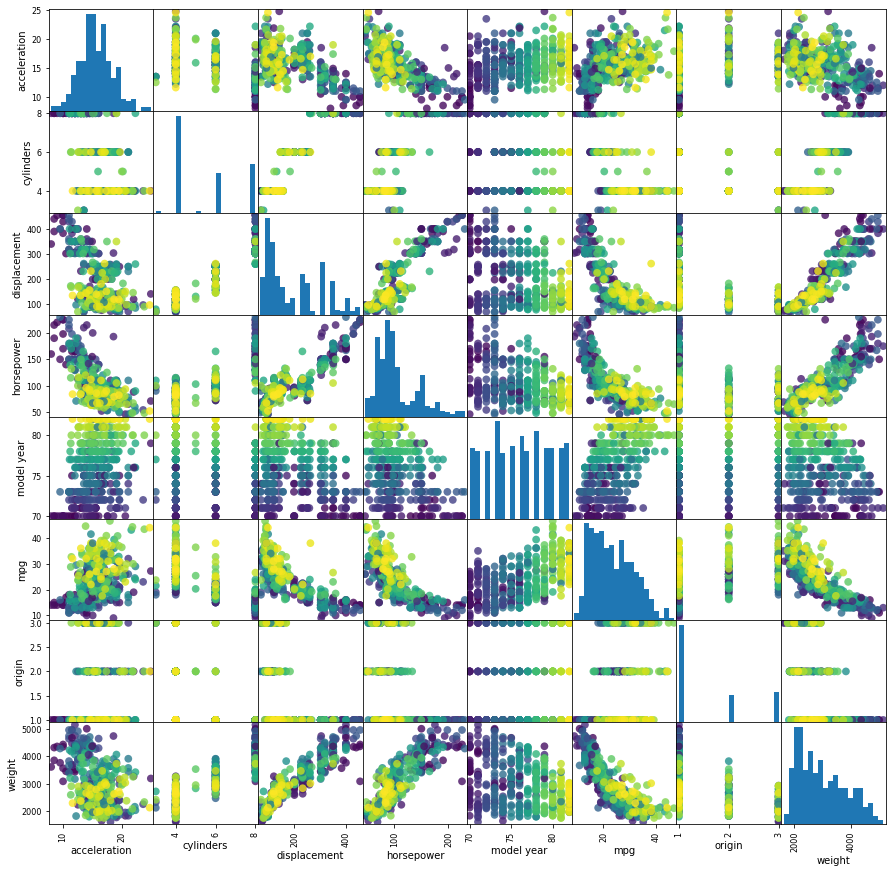

In [9]:

target=pd.factorize(df['car name'])[0]

#scatter Plot for two input variables

pd.plotting.scatter_matrix(X,figsize=(15,15),marker='o',hist_kwds={'bins':20},s=60,alpha=.8,c=target)

plt.show()

C:\Users\aayma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mpg'>

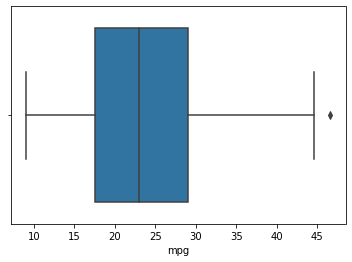

In [10]:
sns.boxplot(df['mpg'])

In [11]:
Q1 = np.percentile(df['mpg'], 25,interpolation = 'midpoint') 
Q3 = np.percentile(df['mpg'], 75,interpolation = 'midpoint') 
IQR = Q3 - Q1 

print("Old Shape: ", df.shape)   
# Upper bound
upper = np.where(df['mpg'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['mpg'] <= (Q1-1.5*IQR))
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
print("New Shape: ", df.shape) 

Old Shape:  (398, 9)
New Shape:  (397, 9)


C:\Users\aayma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mpg'>

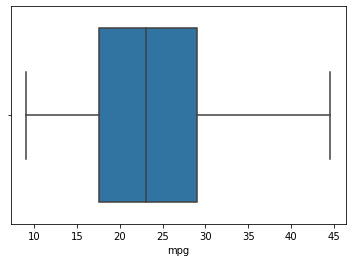

In [12]:
sns.boxplot(df['mpg'])

C:\Users\aayma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='horsepower'>

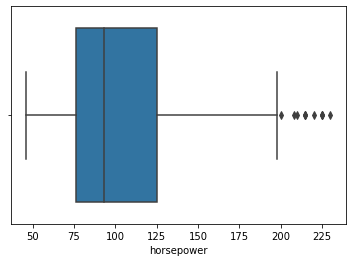

In [13]:
sns.boxplot(df['horsepower'])

In [14]:
Q1 = np.percentile(df['horsepower'], 25,interpolation = 'midpoint') 
Q3 = np.percentile(df['horsepower'], 75,interpolation = 'midpoint') 
IQR = Q3 - Q1 

print("Old Shape: ", df.shape)   
# Upper bound
upper = np.where(df['horsepower'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['horsepower'] <= (Q1-1.5*IQR))
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
print("New Shape: ", df.shape) 

Old Shape:  (397, 9)
New Shape:  (386, 9)


C:\Users\aayma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='horsepower'>

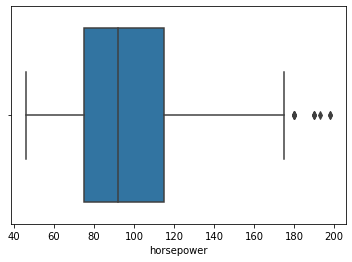

In [15]:
sns.boxplot(df['horsepower'])

In [16]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [17]:
print("Old Shape: ", df.shape) 
df.drop_duplicates()
print("New Shape: ", df.shape)

Old Shape:  (386, 9)
New Shape:  (386, 9)


C:\Users\aayma\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

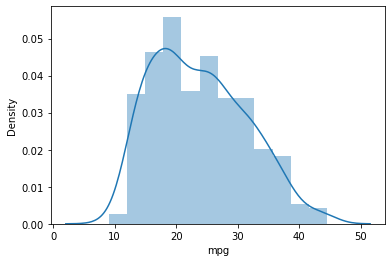

In [18]:
sns.distplot(df['mpg'])

<AxesSubplot:>

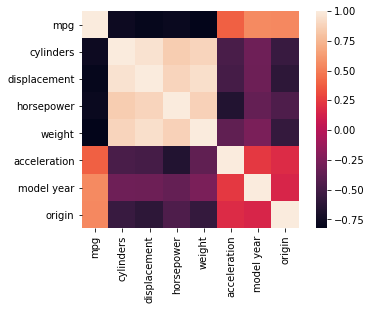

In [19]:
corrmatrix = df.corr()
sns.heatmap(corrmatrix, square=True)

In [20]:
df.corrwith(df.mpg)

mpg             1.000000
cylinders      -0.765059
displacement   -0.801739
horsepower     -0.783433
weight         -0.826527
acceleration    0.387595
model year      0.555415
origin          0.550068
dtype: float64

In [21]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# Horsepower

In [22]:
# features_list ['cylinders', 'displacement', 'horsepower','weight', 'acceleration', 'model year', 'origin']
# df2=df[df.columns.difference(['mpg','cylinders', 'displacement', 'model year', 'origin','car name'])]
X1 = df['horsepower'].to_numpy().reshape(-1, 1)
# print(X1)
y1 = df.iloc[:,0]
# print(y1)


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.33,random_state=0)

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train) #actually produces the linear eqn for the data


LinearRegression()

In [25]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [26]:
y_pred = regressor.predict(X_test) 
y_pred.shape

(128,)

In [27]:
y_test

271    23.2
332    29.8
155    15.0
59     23.0
221    17.5
       ... 
245    36.1
21     24.0
300    23.9
234    24.5
124    11.0
Name: mpg, Length: 128, dtype: float64

In [28]:
regressor.predict(X_train)
X_train.shape

(258, 1)

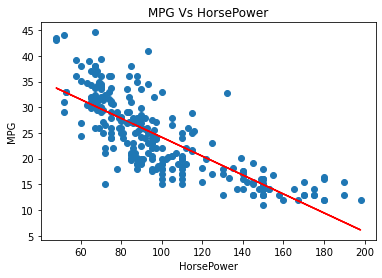

In [29]:
#plot for the TRAIN
 
plt.scatter(X_train, y_train) # plotting the observation line
 
plt.plot(X_train, regressor.predict(X_train), color='r') # plotting the regression line
 
plt.title("MPG Vs HorsePower") # stating the title of the graph
 
plt.ylabel("MPG") # adding the name of x-axis
plt.xlabel("HorsePower") # adding the name of y-axis
plt.show() # specifies end of graph

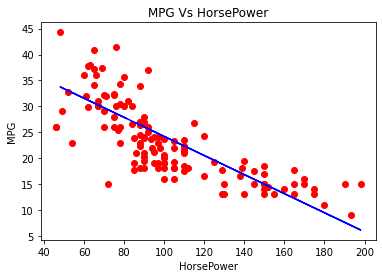

In [30]:
#plot for the TEST
 
plt.scatter(X_test, y_test, color='red') 
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
 
plt.title("MPG Vs HorsePower") # stating the title of the graph
plt.ylabel("MPG") # adding the name of x-axis
plt.xlabel("HorsePower") # adding the name of y-axis
plt.show() 

In [31]:
print('intercept:', regressor.intercept_)
print('slope:', regressor.coef_)

intercept: 42.58396062314918
slope: [-0.18414649]


In [32]:
r_sq = regressor.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.6238036638996829


Score for traning set for 0.2 size is:  0.6285761151951428


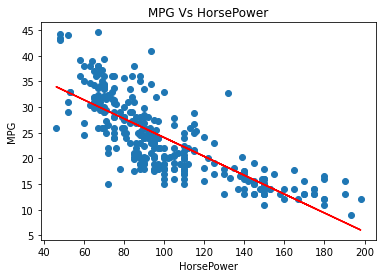

Score for test set for 0.2 size is:  0.5452759908009728 



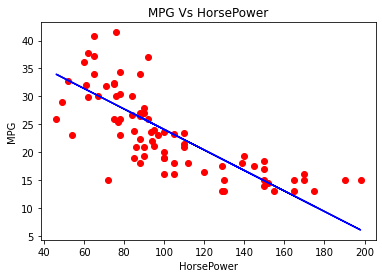

Score for traning set for 0.33 size is:  0.6238036638996829


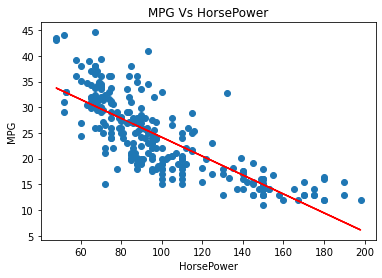

Score for test set for 0.33 size is:  0.5840861906098483 



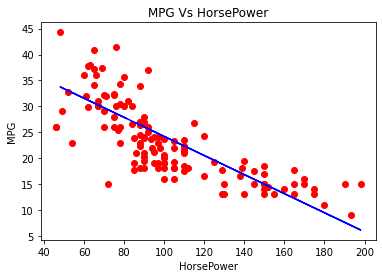

Score for traning set for 0.4 size is:  0.6042538293061853


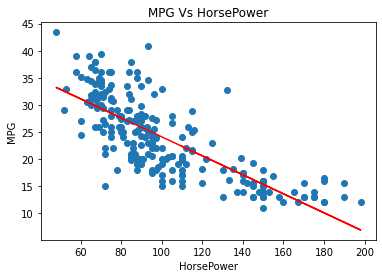

Score for test set for 0.4 size is:  0.6248064154271605 



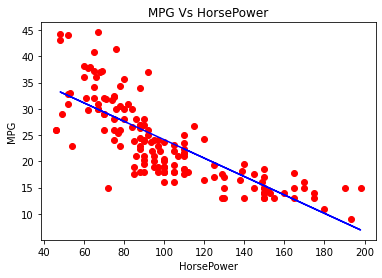

Score for traning set for 0.45 size is:  0.6109457055568119


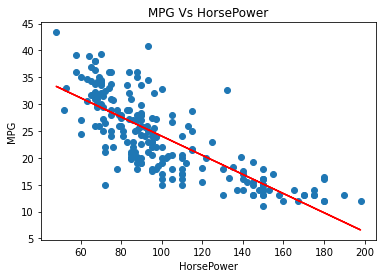

Score for test set for 0.45 size is:  0.6166533111373467 



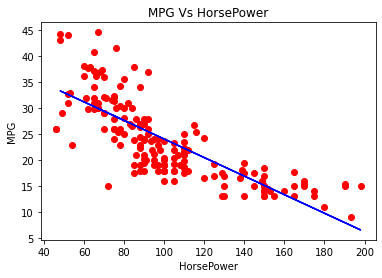

Score for traning set for 0.5 size is:  0.6098716784271956


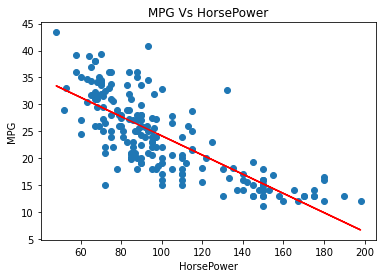

Score for test set for 0.5 size is:  0.6163259006910771 



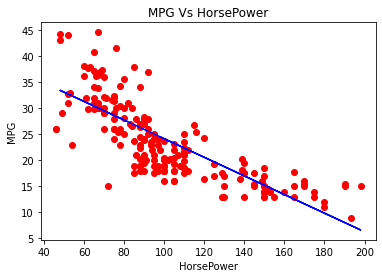

In [33]:
l = [0.2,0.33,0.4,0.45,0.5]

for i in l:
    X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=i,random_state=0)
    regressor.fit(X_train,y_train)
    
    print(f'Score for traning set for {i} size is: ',regressor.score(X_train, y_train))
    #plot for the TRAIN
    plt.scatter(X_train, y_train) # plotting the observation line
    plt.plot(X_train, regressor.predict(X_train), color='r') # plotting the regression line
    plt.title("MPG Vs HorsePower") # stating the title of the graph
    plt.ylabel("MPG") # adding the name of x-axis
    plt.xlabel("HorsePower") # adding the name of y-axis
    plt.show() # specifies end of graph

    print(f'Score for test set for {i} size is: ',regressor.score(X_test, y_test),'\n')
    plt.scatter(X_test, y_test, color='red') 
    plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
    plt.title("MPG Vs HorsePower") # stating the title of the graph
    plt.ylabel("MPG") # adding the name of x-axis
    plt.xlabel("HorsePower") # adding the name of y-axis
    plt.show() 

# displacement

In [34]:
X2 = df['displacement'].to_numpy().reshape(-1, 1)
# print(X1)
y2 = df.iloc[:,0]

In [35]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.33,random_state=0)

In [36]:
from sklearn.linear_model import LinearRegression
reg2 = LinearRegression()
reg2.fit(X2_train,y2_train) #actually produces the linear eqn for the data


LinearRegression()

In [37]:
reg2.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [38]:
y2_pred = reg2.predict(X2_test) 
y2_pred.shape

(128,)

In [39]:
reg2.predict(X2_train)
X2_train.shape

(258, 1)

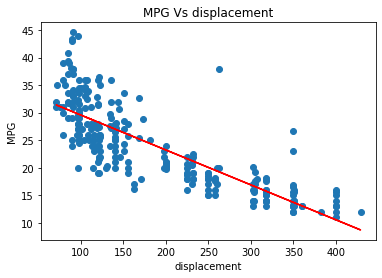

In [40]:
#plot for the TRAIN
 
plt.scatter(X2_train, y2_train) # plotting the observation line
 
plt.plot(X2_train, reg2.predict(X2_train), color='r') # plotting the regression line
 
plt.title("MPG Vs displacement") # stating the title of the graph
plt.ylabel("MPG") # adding the name of x-axis
plt.xlabel("displacement") # adding the name of y-axis
plt.show() # specifies end of graph

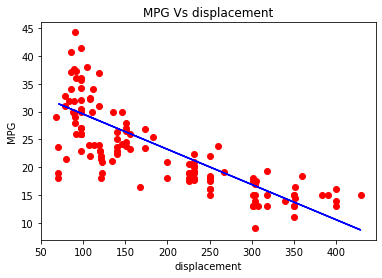

In [41]:
#plot for the TEST
 
plt.scatter(X2_test[:,0], y2_test, color='red') 
plt.plot(X2_train[:,0], reg2.predict(X2_train), color='blue') # plotting the regression line

plt.title("MPG Vs displacement") # stating the title of the graph
plt.ylabel("MPG") # adding the name of x-axis
plt.xlabel("displacement") # adding the name of y-axis
plt.show() # specifies end of graph

In [42]:
print('intercept:', reg2.intercept_)
print('slope:', reg2.coef_)

intercept: 35.90235177153731
slope: [-0.06340116]


In [43]:
r2_sq = reg2.score(X2_train, y2_train)
print('coefficient of determination:', r2_sq)

coefficient of determination: 0.659463709283182


Score for traning set for 0.2 size is:  0.6446319456822592


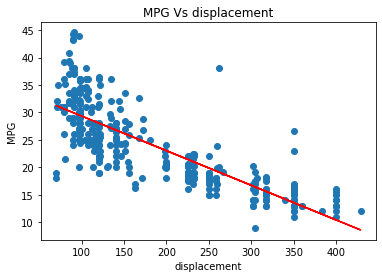

Score for test set for 0.2 size is:  0.6321242794098518 



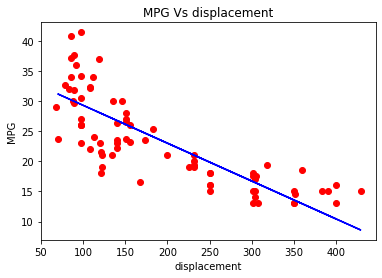

Score for traning set for 0.33 size is:  0.659463709283182


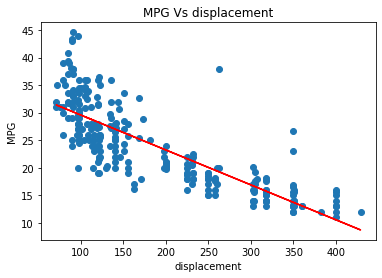

Score for test set for 0.33 size is:  0.5989575465791073 



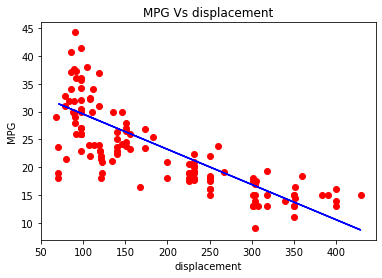

Score for traning set for 0.4 size is:  0.6623519361579947


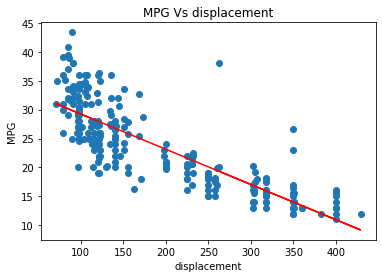

Score for test set for 0.4 size is:  0.6159795619532422 



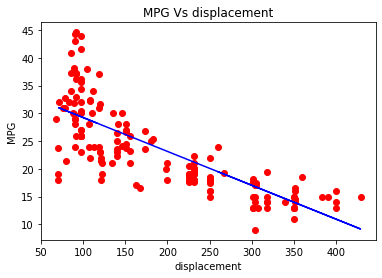

Score for traning set for 0.45 size is:  0.6889122194334039


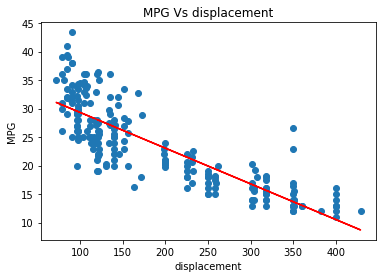

Score for test set for 0.45 size is:  0.5904960061660447 



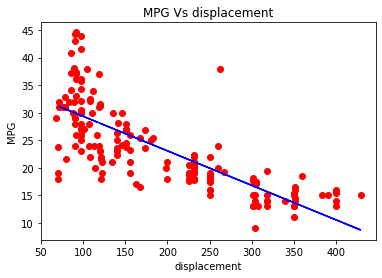

Score for traning set for 0.5 size is:  0.7008832217069862


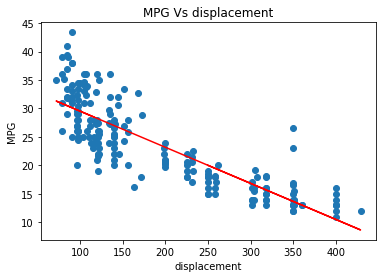

Score for test set for 0.5 size is:  0.5838190201452473 



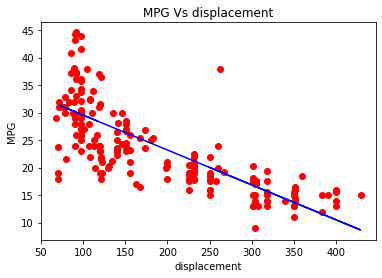

In [44]:
l = [0.2,0.33,0.4,0.45,0.5]

for i in l:
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=i,random_state=0)
    reg2.fit(X2_train, y2_train)
    print(f'Score for traning set for {i} size is: ',reg2.score(X2_train, y2_train))
    #plot for the TRAIN
    plt.scatter(X2_train, y2_train) # plotting the observation line
    plt.plot(X2_train, reg2.predict(X2_train), color='r') # plotting the regression line
    plt.title("MPG Vs displacement") # stating the title of the graph
    plt.ylabel("MPG") # adding the name of x-axis
    plt.xlabel("displacement") # adding the name of y-axis
    plt.show() # specifies end of graph
    
    print(f'Score for test set for {i} size is: ',reg2.score(X2_test, y2_test),'\n')
    #plot for the TEST
    plt.scatter(X2_test[:,0], y2_test, color='red') 
    plt.plot(X2_train[:,0], reg2.predict(X2_train), color='blue') # plotting the regression line
    plt.title("MPG Vs displacement") # stating the title of the graph
    plt.ylabel("MPG") # adding the name of x-axis
    plt.xlabel("displacement") # adding the name of y-axis
    plt.show() # specifies end of graph

# weight

In [45]:
X2 = df['weight'].to_numpy().reshape(-1, 1)
# print(X1)
y2 = df.iloc[:,0]

In [46]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.33,random_state=0)

In [47]:
from sklearn.linear_model import LinearRegression
reg2 = LinearRegression()
reg2.fit(X2_train,y2_train) #actually produces the linear eqn for the data


LinearRegression()

In [48]:
reg2.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [49]:
y2_pred = reg2.predict(X2_test) 
y2_pred.shape

(128,)

In [50]:
reg2.predict(X2_train)
X2_train.shape

(258, 1)

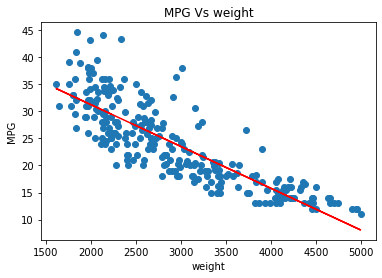

In [51]:
#plot for the TRAIN
 
plt.scatter(X2_train, y2_train) # plotting the observation line
 
plt.plot(X2_train, reg2.predict(X2_train), color='r') # plotting the regression line
 
plt.title("MPG Vs weight") # stating the title of the graph 
plt.ylabel("MPG") # adding the name of x-axis
plt.xlabel("weight") # adding the name of y-axis
plt.show() # specifies end of graph

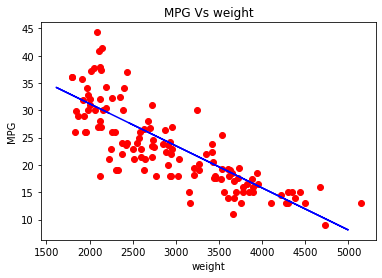

In [52]:
#plot for the TEST
 
plt.scatter(X2_test[:,0], y2_test, color='red') 
plt.plot(X2_train[:,0], reg2.predict(X2_train), color='blue') # plotting the regression line
 
plt.title("MPG Vs weight") # stating the title of the graph 
plt.ylabel("MPG") # adding the name of x-axis
plt.xlabel("weight") # adding the name of y-axis
plt.show() # specifies end of graph

In [53]:
print('intercept:', reg2.intercept_)
print('slope:', reg2.coef_)

intercept: 46.65144720936312
slope: [-0.00771389]


In [54]:
r2_sq = reg2.score(X2_train, y2_train)
print('coefficient of determination:', r2_sq)

coefficient of determination: 0.7022151640885904


Score for traning set for 0.2 size is:  0.6952705760110951


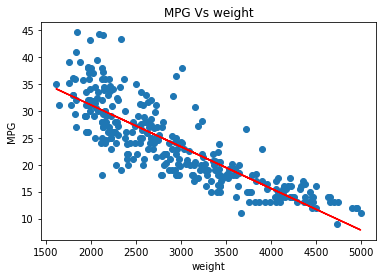

Score for test set for 0.2 size is:  0.6289976696859789 



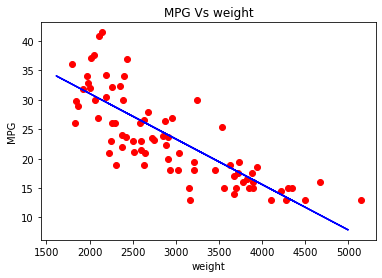

Score for traning set for 0.33 size is:  0.7022151640885904


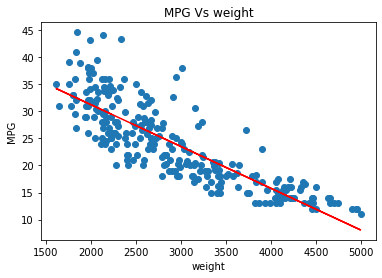

Score for test set for 0.33 size is:  0.6351130602841775 



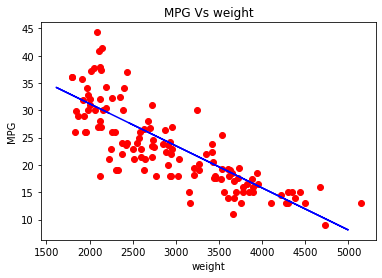

Score for traning set for 0.4 size is:  0.7102604336654521


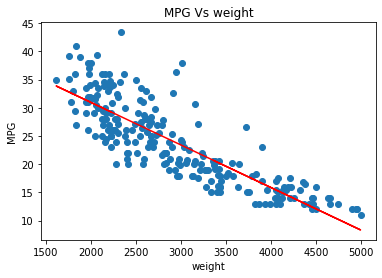

Score for test set for 0.4 size is:  0.6461886108334061 



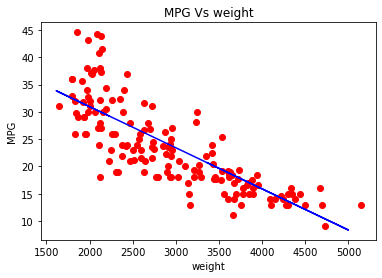

Score for traning set for 0.45 size is:  0.7259884195399442


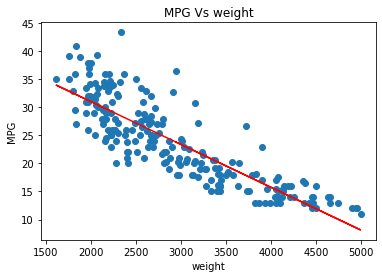

Score for test set for 0.45 size is:  0.6342540573900495 



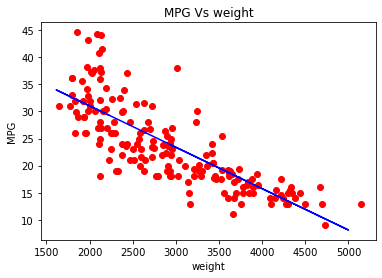

Score for traning set for 0.5 size is:  0.7334205172884094


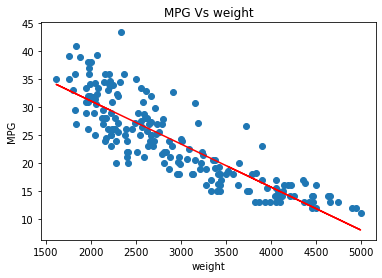

Score for test set for 0.5 size is:  0.6333281361415615 



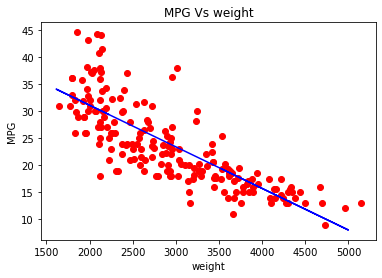

In [55]:
l = [0.2,0.33,0.4,0.45,0.5]

for i in l:
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=i,random_state=0)
    reg2.fit(X2_train, y2_train)
    print(f'Score for traning set for {i} size is: ',reg2.score(X2_train, y2_train))
    #plot for the TRAIN
    plt.scatter(X2_train, y2_train) # plotting the observation line
    plt.plot(X2_train, reg2.predict(X2_train), color='r') # plotting the regression line
    plt.title("MPG Vs weight") # stating the title of the graph
    plt.ylabel("MPG") # adding the name of x-axis
    plt.xlabel("weight") # adding the name of y-axis
    plt.show() # specifies end of graph
    
    print(f'Score for test set for {i} size is: ',reg2.score(X2_test, y2_test),'\n')
    #plot for the TEST
    plt.scatter(X2_test[:,0], y2_test, color='red') 
    plt.plot(X2_train[:,0], reg2.predict(X2_train), color='blue') # plotting the regression line
    plt.title("MPG Vs weight") # stating the title of the graph
    plt.ylabel("MPG") # adding the name of x-axis
    plt.xlabel("weight") # adding the name of y-axis
    plt.show() # specifies end of graph

# My Implementation

In [81]:
X3 = df['weight'].to_numpy().reshape(-1,1)
y3 = df.iloc[:,0]

In [82]:
X3 = (X3 - X3.mean()) / X3.std() # pandas automatically take the mean and std for every feature in the dataframe
y3 = (y3 - y3.mean()) / y3.std()

In [101]:
class GD_LinearRegression:
    def __init__(self):
        self.trained = False
        self.b = 0
    def train(self,x,y,alpha,iteration,ds_cost):
        self.trained = True
        m=len(x)
#         x = np.insert(x,0,np.ones(m),axis=1)
        self.b = np.zeros(x.shape[1])
        x_transpose = x.T
        it = 0
        for epoch in range(iteration):
            h=x@(self.b)
            grad=(x_transpose@(h-y)) / m
            self.b=self.b-(alpha*grad)
            it += 1
            if self.cost(x,y) <= ds_cost:
                break
        return it
            
        
    def predict(self,x):
        if self.trained:
            h = x.dot(self.b)
            return h
        else:
            return print('Please train your model first')
        
    def cost(self,x,y):
        m=len(x)
        h = self.predict(x)
        return sum((h-y)**2)/m
    
    def plot(self,x,y):
        h = self.predict(x)
        plt.plot(x[:,0],h,c='r')
        plt.scatter(x[:,0],y,c='b')
        plt.show()

Number of Itreation Before Break is : 32
0.3168352939746164


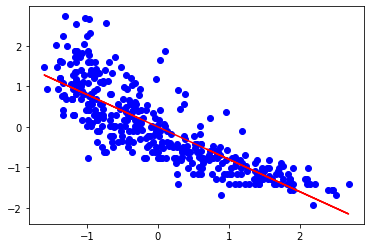

In [104]:
lin = GD_LinearRegression()
it = lin.train(X3,y3,0.1,100,0.317)
print('Number of Itreation Before Break is :',it)
h = lin.predict(X3)
cost = lin.cost(X3,y3)
print(cost)
lin.plot(X3,y3)

In [105]:
def R2(y,h):
    ymean = np.mean(y)
    ssres = sum((y-h)**2)
    sstot = sum((y-ymean)**2)
    r2 = 1-(ssres/sstot)
    return r2
R2(y3,h)

0.6823417572098645